In [2]:
import scipy.io as sio
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from PIL import Image

In [5]:
mat_contents = sio.loadmat('new_spec_normals.mat')
norms = np.array(mat_contents['specNormals'])

In [6]:
mat_contents

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Fri Jun 10 00:27:15 2022',
 '__version__': '1.0',
 '__globals__': [],
 'specNormals': array([[ 0.34252611,  0.1271153 ,  0.93086925],
        [ 0.21803562,  0.78116986,  0.58500779],
        [ 0.145679  ,  0.27659633,  0.94988004],
        ...,
        [-0.24874496, -0.07538453,  0.96563094],
        [-0.35630602,  0.0982924 ,  0.92918492],
        [-0.21787465,  0.10310383,  0.97051545]])}

In [30]:
norms

array([[ 0.00467902,  0.00111908,  0.00213161],
       [ 0.00467313,  0.0940245 ,  0.00213161],
       [ 0.00364916,  0.00227516,  0.00213161],
       ...,
       [-0.00302768,  0.00014957,  0.00213161],
       [-0.00355784,  0.00080026,  0.00213161],
       [-0.00288835,  0.00081736,  0.00213161]])

In [7]:
normalized = preprocessing.normalize(norms)

In [8]:
np.shape(norms)

(220081, 3)

In [50]:
normalized

array([[ 0.88919785,  0.21267005,  0.4050909 ],
       [ 0.04962721,  0.99851124,  0.02263709],
       [ 0.76029949,  0.47402772,  0.4441198 ],
       ...,
       [-0.81700978,  0.0403603 ,  0.57520958],
       [-0.84228562,  0.18945385,  0.50464064],
       [-0.78452894,  0.22201065,  0.57898672]])

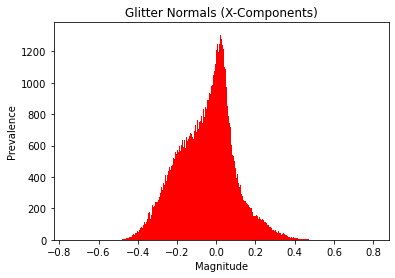

In [34]:
plt.hist(x=normalized[:,0], bins=1000, color='Red')
plt.xlabel('Magnitude')
plt.ylabel('Prevalence')
plt.title('Glitter Normals (X-Components)')
plt.savefig('red.jpg')

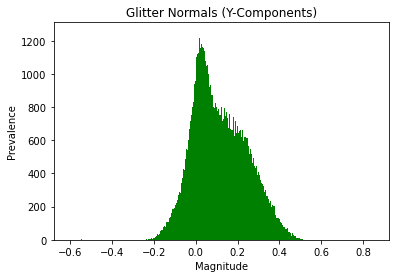

In [32]:
plt.hist(x=normalized[:,1], bins=1000, color ='green')
plt.xlabel('Magnitude')
plt.ylabel('Prevalence')
plt.title('Glitter Normals (Y-Components)')
plt.savefig('green.jpg')

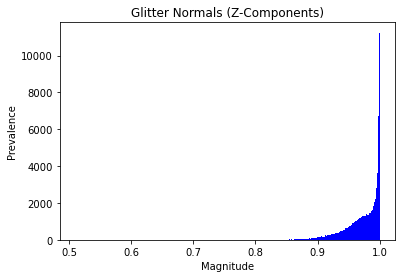

In [33]:
plt.hist(x=normalized[:,2], bins=1000, color='blue')
plt.xlabel('Magnitude')
plt.ylabel('Prevalence')
plt.title('Glitter Normals (Z-Components)')
plt.savefig('blue.jpg')

In [10]:
mat_contents = sio.loadmat('spec_centroids.mat')
pos = mat_contents['C_canonical']

In [11]:
len(pos)

220081

In [44]:
pos[:,0]

array([-41.05723086, -40.88777888, -26.26389094, ..., 310.68051351,
       310.35491459, 310.4758689 ])

In [12]:
x_start = np.amin(pos[:,0])
x_end = np.amax(pos[:,0])
y_start = np.amin(pos[:,1])
y_end = np.amax(pos[:,1])

In [13]:
xdim = np.amax(pos[:,0]) - np.amin(pos[:,0])
ydim = np.amax(pos[:,1]) - np.amin(pos[:,1])

In [14]:
print(y_start)
print(y_end)

-4.418446213707223
300.22404739574233


In [15]:
n_map = np.zeros([400, 400, 3], dtype=np.float64)

In [16]:
n_map[300][1]

array([0., 0., 0.])

In [17]:
n_map = np.zeros([400, 400, 3], dtype=np.float64)
for _id, _norm in enumerate(normalized):
    _pos = pos[_id]
    x, y = int((_pos[0] + np.abs(x_start)) / xdim * 399), int((_pos[1] + np.abs(y_start)) / ydim * 399) 
    n_map[x][y] = _norm * 255.

In [18]:
np.shape(n_map)

(400, 400, 3)

In [19]:
res = Image.fromarray(n_map.astype(np.uint8))

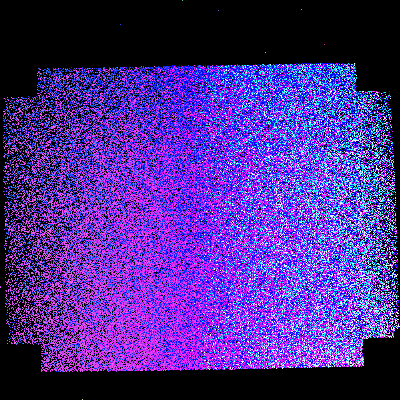

In [20]:
res

In [26]:
print(xdim)
print(ydim)

393.2196605792313
304.64249360944956


In [ ]:
print 